<a href="https://colab.research.google.com/github/saurabhdaund76/Hotel-Booking-Analysis/blob/main/Regulized_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.linear_model import Lasso , LassoCV
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
boston = load_boston()
boston.data.shape

(506, 13)

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940

In [36]:
# here we will be taking only 7 features as we have total 13 features 

feature_number = 7

X = boston.data[:,:feature_number] # x has total 7 features
y = boston.target
features = boston.feature_names[:feature_number] # Here features are the columns names of the 7 features we selected

# lets make a dataframe outof these 7 features 
df = pd.DataFrame(data= X, columns=features)

In [37]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2


In [38]:
# split the data into train test and standerdize them 

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2 , random_state =0)

std_transformation = StandardScaler()  # While linear rgression we should bring down all the variables to same scale
X_train_transformed = std_transformation.fit_transform(X_train)  # variable means transformed X_train ie this is scaled dataset 
X_test_transformed = std_transformation.transform(X_test) # transformed X_test


In [39]:
# to get the coefficients of the features of our model we will loop through diifernet penalty score (alpha) or lambda 

alpha_values = 10** np.arange(1,5)    # random alpha values 

ridge_coeiff = []

for alpha in alpha_values:
  ridge = Ridge(alpha= alpha , fit_intercept= True)  # here variable ridge stored ridge linear regression and alpha values into it
  ridge.fit(X_train_transformed, y_train)  # here we fitted the train_values to train a model 
  ridge_coeiff.append(ridge.coef_)

print(f"different alpha values are : {alpha_values}")

different alpha values are : [   10   100  1000 10000]


In [40]:
ridge_coeiff

[array([-1.77430991,  0.51775087, -1.17625349,  1.04942202, -0.33269118,
         4.99468457, -0.63751086]),
 array([-1.51996092,  0.65118096, -1.17825278,  0.96039229, -0.55952709,
         4.06823922, -0.58542667]),
 array([-0.73991884,  0.5829575 , -0.80784264,  0.43245969, -0.61471607,
         1.56987671, -0.53508059]),
 array([-0.13736398,  0.13291708, -0.17186011,  0.0630065 , -0.1479362 ,
         0.24371027, -0.13238859])]

* What we can obsereve from the above ridge coieff, we clearly see that as we increase the value of alpha our coefs are decresing
* for ex for the alpha value of 10 our coeffs were [array([-1.77430991,  0.51775087, -1.17625349,  1.04942202, -0.33269118, 4.99468457, -0.63751086])
* But for the 100000 alpha value our coef are array([-0.13736398,  0.13291708, -0.17186011,  0.0630065 , -0.1479362 ,0.24371027, -0.13238859])
* This all is happing because of gradient desent algorithm that works on every value of beta or coeff of a feature.



**So for the higher values of alpha the coef values are decreasing this is what ridge linear regression defines**

In [41]:
def coef_versus_alpha_plot(coef, alpha_values , features):
    """
    Pass in the estimated weight, the alpha value and the names
    for the features and plot the model's estimated coefficient weight 
    for different alpha values
    """
    fig = plt.figure(figsize = (8, 6))
    
    # ensure that the weight is an array
    coef = np.array(coef)
    for col in range(coef.shape[1]):
        plt.plot(alpha_values, coef[:, col], label = features[col])

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)

    # manually specify the coordinate of the legend
    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title('Coeff as Alpha Grows')
    plt.ylabel('Coeff')
    plt.xlabel('alpha')
    return fig

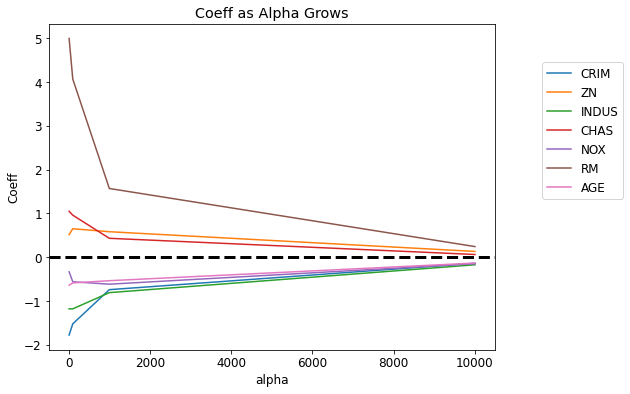

In [42]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12


ridge_fig = coef_versus_alpha_plot(ridge_coeiff, alpha_values, features)

*  As we have 4 values of alpha, so at alpha =0 we can see that it is unregulized model, as we can see RM has high positive coef which states that higher the RM value higher will be the price of the house, simpilarly lower the crime rate ie blue line higher the price

* So for alpha at 100 more values are shrink similarly for 1000

* So as the alpha is 1000 we can  see that value for the RM shrinks from 4.5 to nearly 1.4 so there is huge drop in coeff value and same gose with all the regression coeffs

* ie magnitudes of the coeffi are decreasing as alpha is incresing

* So in case of alpha = 10000 all the coeff are almost close to zero but not perfectly zero

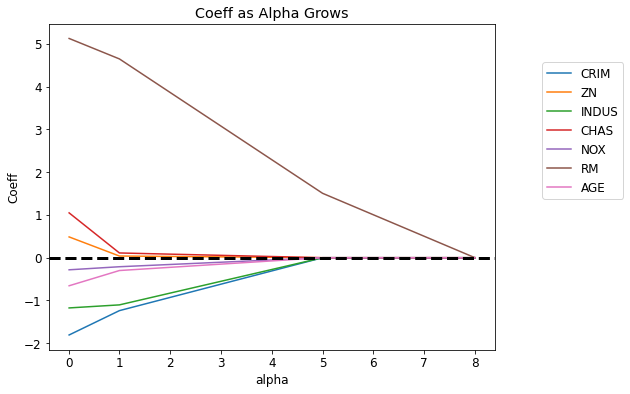

In [43]:
# Now lets see how it goes with lasso regression 

alphas_for_lasso = [0.01, 0.1 , 1, 5,8]

lasso_coeff = []

for alpha in alphas_for_lasso:
  lasso= Lasso(alpha=alpha, fit_intercept= True)
  lasso.fit(X_train_transformed , y_train)
  lasso_coeff.append(lasso.coef_)

lasso_fig = coef_versus_alpha_plot(lasso_coeff , alphas_for_lasso , features)

* So we can see first at alpha 0 we can see the coeff values ie unregulized condition

* As we increase the alpha we can see at alpha=5 almost all the coeff are 0 ie exaxtly zero

* so we can say that all the unecesarry features are zero and now left with only RM which also gets zero at alpha = 8 

* so this algorithm says that the features will be zero with no importance and only important features will be remained

* After alpha 8 all the coeff are gone to zero and we are remained with only beta0 ie intercept as we written above we have given fit_intercept as true which states we are considering beta

* So here very highly regularized model is he simplest model 

* Lasso regression is preferred if we want a sparse model, meaning that we believe many features are irrelevant to the output.